# Оглавление
1. [Многомерный статистический анализ. Линейная регрессия.](#regr)
    * [Задание 1](#regr_1)
        * [Задание 1.1](#regr_1_1)
        * [Задание 1.2](#regr_1_2)
    * [Задание 2](#regr_2)
    * [Задание 3](#regr_3)

# Многомерный статистический анализ. Линейная регрессия. <a class='anchor' id='regr'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1 <a class='anchor' id='regr_1'>
    
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
    
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
    
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
    
*Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).*

In [2]:
# Список заработной платы заемщиков банка zp
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float32)
# Список значений их поведенческого кредитного скоринга ks
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float32)

In [3]:
# Запомним количество элементов
n = len(x)

In [4]:
def plot(b1=0, b0=0):
    """ 
    Строит линию линейной регрессии и отображает исходные точки
    :param b1: slope
    :param b0: intercept
    """
    plt.scatter(x, y, label='Исходные точки')
    
    if b1 != 0:
        y_hat = b1 * x + b0
        plt.plot(x, y_hat, color='red', label='Линия регрессии')
    
    plt.xlabel('zp')
    plt.ylabel('ks')
    plt.legend()
    
    plt.show()

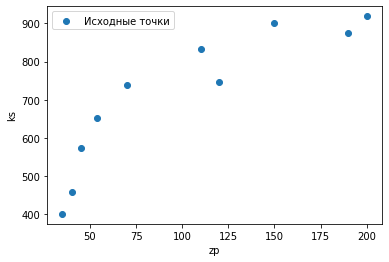

In [5]:
# Отобразим распределение точек
plot()

**Задание 1.1** <a class='anchor' id='regr_1_1'>
    
*Произвести расчет с использованием intercept*

Предполагаем, что зависимость целевой переменной $y$ от признака $x$ описывается линейной функцией:

$$y = \beta_0 + \beta_1 x,$$

где $\beta_0$, $\beta_1$ - коэффициенты линейной регрессии.

Формулы для расчета коэффициентов линейной регрессии:

$$\beta_1 = \frac{n \sum_{i = 1}^n x_i y_i - \left(\sum_{i = 1}^n x_i \right) \left( \sum_{i = 1}^n y_i \right)}{n \sum_{i = 1}^n x_i^2 - \left( \sum_{i = 1}^n x_i \right)^2},$$

$$\beta_0 = \frac{1}{n}\sum_{i = 1}^n y_i - \beta_1 \frac{1}{n}\sum_{i = 1}^n x_i,$$

где $x_i$ - список заработной платы заемщиков банка (zp), $y_i$ - список значений их поведенческого кредитного скоринга ks.

Проведя вычисления, получаем следующие значения коэффциентов:

$$\beta_0 \approx 444.177,$$

$$\beta_1 \approx 2.621.$$

Также вычислим коэффициенты с помощью матричного метода. 

В этом случае для коэффициентов записывается матричное уравнение:

$$\begin{pmatrix}
    y_{1} \\
    y_{2} \\
    \dots \\
    y_{n}
\end{pmatrix} = 
\begin{pmatrix}
    1 & x_{1} \\
    1 & x_{2} \\
    \dots & \dots \\
    1 & x_{n}
\end{pmatrix} 
\begin{pmatrix}
    \beta_{0} \\
    \beta_{1}
\end{pmatrix},$$

и коэффициенты вычислятся следующим образом:

$$B = (X^T X)^{-1} X^T Y \approx 
\begin{pmatrix}
    444.177 \\
    2.621
\end{pmatrix}.$$

Таким образом, уравнение аппроксимации можно записать следующим образом:

$$y = 2.621 x + 444.177.$$

In [6]:
# Расчет через формулы
b1 = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(np.power(x, 2)) - np.power(np.sum(x), 2))
b0 = np.mean(y) - b1 * np.mean(x)
print(f'Через формулы: b0 = {b0}, b1 = {b1}')

# Расчет матричным методом
X = x.reshape((n, 1))
Y = y.reshape((n, 1))

X = np.hstack([np.ones((n, 1)), X])

B = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(f'Матричный метод: b0 = {B[0]}, b1 = {B[1]}')

Через формулы: b0 = 444.17737773979707, b1 = 2.6205388824027653
Матричный метод: b0 = 444.1773573243596, b1 = 2.6205388824027636


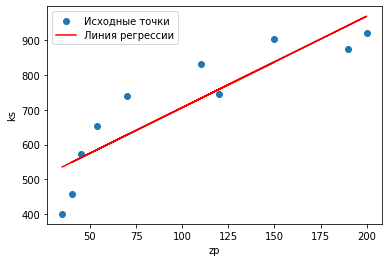

In [7]:
# Построим аппроксимирующую линию
plot(b1, b0)

**Ответ (задание 1.1):** $y = 2.621 x + 444.177$.

**Задание 1.2** <a class='anchor' id='regr_1_2'>
    
*Произвести расчет без intercept*

Предполагаем, что зависимость целевой переменной $y$ от признака $x$ описывается линейной функцией:

$$y = \beta_1 x,$$

где $\beta_1$ - коэффициент линейной регрессии.

Формула для расчета коэффициента $\beta_1$ линейной регрессии:

$$\beta_1 = \frac{\sum_{i = 1}^n x_i y_i}{\sum_{i = 1}^n x_i^2},$$

где $x_i$ - список заработной платы заемщиков банка (zp), $y_i$ - список значений их поведенческого кредитного скоринга ks.

Проведя вычисления, получаем следующие значения коэффциентов:

$$\beta_1 \approx 5.889.$$

Также вычислим этот коэффициент с помощью матричного метода. В этом случае записывается матричное уравнение:

$$\begin{pmatrix}
    y_{1} \\
    y_{2} \\
    \dots \\
    y_{n}
\end{pmatrix} = 
\begin{pmatrix}
    x_{1} \\
    x_{2} \\
    \dots \\
    x_{n}
\end{pmatrix} 
\begin{pmatrix}
    \beta_{1}
\end{pmatrix},$$

и коэффициенты вычислятся следующим образом:

$$B = (X^T X)^{-1} X^T Y \approx 
\begin{pmatrix}
    5.889
\end{pmatrix}.$$

Таким образом, уравнение аппроксимации можно записать следующим образом:

$$y = 5.889 x.$$

In [8]:
# Расчет через формулы
b = (np.sum(x * y)) / (np.sum(np.power(x, 2)))
print(f'Через формулы: b1 = {b}')

# Расчет матричным методом
X = x.reshape((n, 1))
Y = y.reshape((n, 1))

B = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(f'Матричный метод: b1 = {B[0]}')

Через формулы: b1 = 5.889820575714111
Матричный метод: b1 = 5.889820098876953


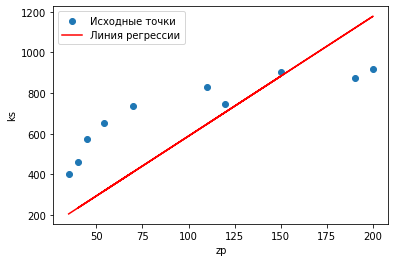

In [9]:
# Построим аппроксимирующую линию
plot(b)

**Ответ (задание 1.2):** $y = 5.889 x$.

*Сравним аппроксимирующие линии, полученные с intercept и без него.*

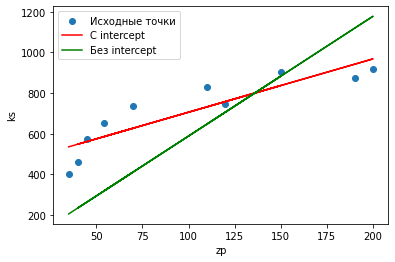

In [10]:
y_hat1 = b1 * x + b0
y_hat2 = b * x

plt.scatter(x, y, label='Исходные точки')
plt.plot(x, y_hat1, color='red', label='С intercept')
plt.plot(x, y_hat2, color='green', label='Без intercept')

plt.legend()
plt.xlabel('zp')
plt.ylabel('ks')

plt.show()

### Задание 2 <a class='anchor' id='regr_2'>
    
*Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).*

In [11]:
def mse(b):
    """ 
    Вычисляет среднеквадратичную ошибку MSE для случая без intercept
    :param b: slope
    """
    return np.sum(np.power(y - b * x, 2)) / n 

In [12]:
def derivative(b):
    """ 
    Вычисляет значение производной функции mse для случая без intercept
    :param b: slope
    """
    return -(2 / n) * np.sum((y - b * x) * x)

In [13]:
# Скорость градиентного спуска
alpha = 1e-6
# Начальное приблжение для b
b = 0.1
# Условие остановки алгоритма
tolerance = 1e-5
# Счетчик цикла
i = 0

# Алгорит градиентного спуска
while True:
    mse_prev = mse(b)
    b -= alpha * derivative(b)
    
    mse_curr = mse(b)
    if i % 100 == 0:
        print(f'Итерация {i}: b = {b}, mse = {mse_curr}')
        
    if np.abs(mse_curr - mse_prev) < tolerance:
        break
    i += 1

print('\nРезультат:')
print(f'Итерация {i}: b = {b}, mse = {mse_curr}')

Итерация 0: b = 0.25952807499999997, mse = 493237.7
Итерация 100: b = 5.545378396874999, mse = 58151.325
Итерация 200: b = 5.868748630859372, mse = 56522.98125

Результат:
Итерация 271: b = 5.886921870703124, mse = 56516.98125


Видно, что полученное значение совпадает со значением из [Задания 1.2](#regr_1_2) с точностью до второго знака.

**Ответ (задание 2):** $y = 5.887 x$.

### Задание 3 <a class='anchor' id='regr_3'>
    
*Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).*

Для определения начальных значений для коэффициентов линейной регрессии построим график.

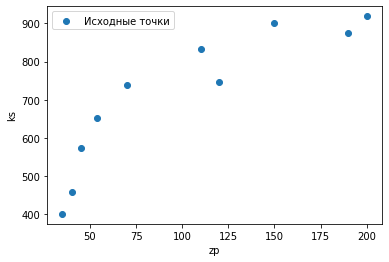

In [14]:
plot()

Из графика можно предположить, что для b0 (intercept) можно взять начальное значение примерно равное 400-450.

In [15]:
def mse(b0, b1):
    """ 
    Вычисляет среднеквадратичную ошибку MSE для случая с intercept
    :param b0: intercept
    :param b1: slope
    """
    return np.sum(np.power(y - b0 - b1 * x, 2)) / n 

In [16]:
def derivative_b0(b0, b1):
    """ 
    Вычисляет частную производную функции mse по b0 для случая с intercept
    :param b0: intercept
    :param b1: slope
    """
    return -(2 / n) * np.sum(y - b0 - b1 * x)

In [17]:
def derivative_b1(b0, b1):
    """ 
    Вычисляет частную производную функции mse по b1 для случая с intercept
    :param b0: intercept
    :param b1: slope
    """
    return -(2 / n) * np.sum((y - b0 - b1 * x) * x)

In [18]:
# Скорость градиентного спуска
alpha = 1e-6
# Начальное приблжение для коэффициентов b0, b1
b0_prev = 400.0
b1_prev = 1.0
# Условие остановки алгоритма
tolerance = 1e-6
# Счетчик цикла
i = 0

# Алгорит градиентного спуска
while True:
    mse_prev = mse(b0_prev, b1_prev)
    
    b0_curr = b0_prev - alpha * derivative_b0(b0_prev, b1_prev)
    b1_curr = b1_prev - alpha * derivative_b1(b0_prev, b1_prev)
    
    mse_curr = mse(b0_curr, b1_curr)
    if i % 100 == 0:
        print(f'Итерация {i}: b0 = {b0_curr}, b1 = {b1_curr}, mse = {mse_curr}')
    
    if np.abs(mse_curr - mse_prev) < tolerance:
        break
        
    b0_prev, b1_prev = b0_curr, b1_curr
    
    i += 1

print('\nРезультат:')
print(f'Итерация {i}: b0 = {b0_curr}, b1 = {b1_curr}, mse = {mse_curr}')

Итерация 0: b0 = 400.000417, b1 = 1.0536102, mse = 56285.46875
Итерация 100: b0 = 400.0157314055635, b1 = 2.829854116796876, mse = 7149.634375
Итерация 200: b0 = 400.01877133918475, b1 = 2.938486466699219, mse = 6965.7453125

Результат:
Итерация 261: b0 = 400.0201804502016, b1 = 2.9442677026367194, mse = 6965.046875


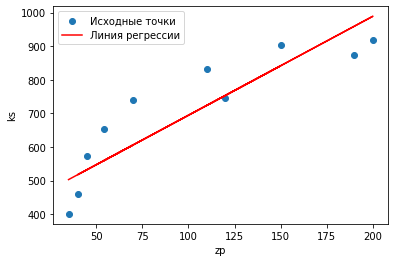

In [19]:
# Построим аппроксимирующую линию с полученными коэффициентами
plot(b1_curr, b0_curr)

При тестировании алгоритма была замечена особенность, что при задании любых значений примерно > 100 для $\beta_0$, алгоритм довольно быстро сходился к значению, похожему на начальное. Чтобы понять причину такого поведения, был построен график функции ошибок MSE (рисунок ниже). На рисунке видно, что похоже функция имеет очень пологий участок, на котором функция принимает минимальное значение. К этому частку сходится алгоритм при разных начальных значениях.

<img src="mse.png">

**Ответ (задание 3):** $y = 2.944 x + 400.02$.